# Regresja logistyczna

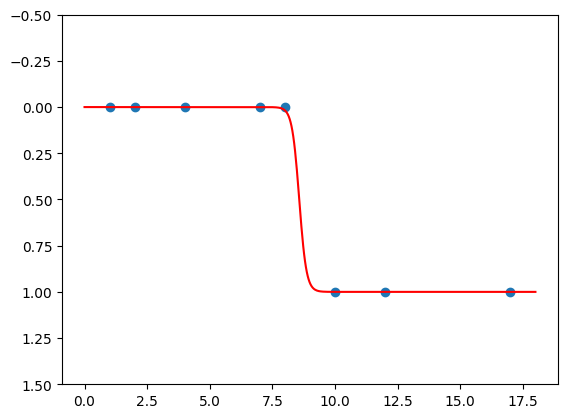

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def transformation(x):
    a = 7
    b = -60
    return 1/(1+np.exp(-1*(a*x+b)))
    
    
X = [1,2,4,7,8,10,12,17]
Y = [0,0,0,0,0,1,1,1]
function_sampling_x_coordinates = np.linspace(0,18,500)
function_sampling_y_coordinates = [transformation(x) for x in function_sampling_x_coordinates]

plt.plot(X, Y, "o")
plt.plot(function_sampling_x_coordinates, function_sampling_y_coordinates, 'r-')
plt.ylim(bottom = 1.5, top = -0.5)

plt.show()

## Zadanie 1
Zamień postać funkcji `transformation` tak, aby stworzyła krzywą logistyczną klasyfikującą nasze dane za pomocą funkcji sigmoidalnej postaci:
$$\frac{1}{1+e^{-(ax+b)}}$$

Jaki wpływ ma zmiana wartości parametru a na funkcję?


Zmiana a wpływa na stromość krzywej, im większe a, tym bardziej stroma staję się krzywa

Jaki wpływ ma zmiana wartości parametru b na funkcję?

Zmiana parametru b wpływa na przesunięcie krzywej wzdłuż osi X.

## Zadanie 2
Na podstawie dokumentacji sklearn, stwórz klasyfikator `LogisticRegression` i wytrenuj go odpowiednio, aby dobrze separował przestrzeń.

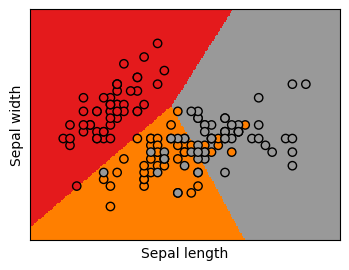

0.82

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from helpers_lab2 import plot_boundary

iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target 

logreg = linear_model.LogisticRegression()
logreg.fit(X,Y)
plot_boundary(logreg, X, Y)
logreg.score(X, Y)


# Sieci neuronowe

## Zadanie 3:
Odwiedź stronę [playground.tensorflow.org](http://playground.tensorflow.org)

Zredukuj sieć neuronową do minimalnej postaci (0 hidden layers; nie zmieniaj kolumny features) i rozpocznij proces uczenia na problemie nr 3 (dwa rozdzielne skupiska- ang.Gaussian) - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? (spójrz na wizualizację oraz wykres training/test loss)

Tak, pojedynczy neuron zdołał poprawnie wyznaczyć granicę decyzyjną, zarówno test loss jak i traning loss są równe jeden, a wizualizacija potwierdza poprawność klasyfikacji.

Czy dodawanie warstw ukrytych coś zmienia w kontekście wyuczenia? a w kontekście czasu wyznaczania granicy decyzyjnej?

Dodawanie warstw ukrytych zmienia kształ granicy decyzyjnej oraz  zmniejsza czas wyznaczenia granicy decyzyjnej.

Zmień zbiór danych na pierwszy (niebieska chmura wewnątrz pomarańczowej obręczy); czy tutaj minimalna sieć uczy się odpowiednio? Odpowiedź uzasadnij.

Minimalna sieć nie radzi sobie z tym zbiorem danych. Wartości funkcji strat dla danych testowych i treningowych pozostają na poziomie odpowiednio 0.510 i 0.485, co wskazuje, że model nie poprawia się wraz z czasem. Sieć jest niezdolna do dopasowania odpowiedniej granicy decyzyjnej.

Jak sprawić, aby sieć zaczęła dobrze działać na zbiorze nr 1? Rozważ niezbędne modyfikacje (**preferuj najprostsze sposoby**) zarówno w kolumnie features, jak i manipulacje warstwami ukrytymi (hidden layers).

Aby sieć zaczeła dobrze działać można dodać nieliniowe cechy wejściowe tj. X12 i X22 lub zwiększyć liczbę warstw hidden layers wraz z większą liczbą neuronów.

## Zadanie 4

Na podstawie dokumentacji sklearn, stwórz `MLPClassifier`, wytrenuj go a następnie użyj wytrenowanego modelu do przewidywania etykiet na zbiorze testowym.
Utwórz klasyfikator w zmiennej `mlp`, a listę przewidzianych etykiet umieść w obiekcie `predicted`. Doprowadź do sytuacji, w której masz **nie więcej niż 8 błędów** na zbiorze testowym.

Macierz pomyłek:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  0  0  0  1  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  1 34]]

Liczba błędów: 6


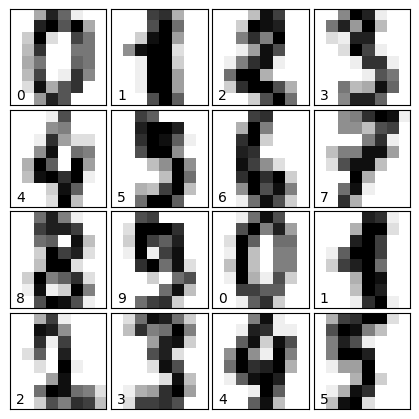

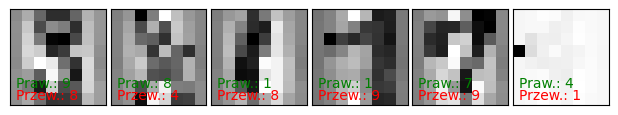

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

digits = load_digits() 

fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(500,), learning_rate_init=0.001, activation='relu', max_iter=300, random_state=16)

mlp.fit(X_train, y_train)

predicted = mlp.predict(X_test)

cm = confusion_matrix(y_test, predicted)
print("Macierz pomyłek:")
print(cm)

errors = np.sum(predicted != y_test)
print(f"\nLiczba błędów: {errors}")

if errors > 0:
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    cnt = 0
    for i in range(len(X_test)):
        if predicted[i] == y_test[i]:
            continue
        ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
        ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, f"Przew.: {predicted[i]}", color='red')
        ax.text(0, 6, f"Praw.: {y_test[i]}", color='green')
        cnt += 1
        if cnt >= 64:
            break

plt.show()
